In [1]:
from setup_fitting import load_data, init_optimize_df, infer_signal, const_params, var_params, stratifiers, param_bounds, ABUNDANCE_COLS, AFFINITY_COLS, RCPS
from fit import fit
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = load_data()
df

,Tube #,Donor,Incubation time (hr),Cells,Cetuximab Variant,Cetuximab Concentration (ug/ml),Cytokine,Response
0,10,2,2,NK cells + A549,-,0,IFN-γ,193.395592
1,11,2,2,NK cells + A549,WT,0.01,IFN-γ,661.843404
2,12,2,2,NK cells + A549,G236A,0.01,IFN-γ,483.266052
3,13,2,2,NK cells + A549,A330L I332E,0.01,IFN-γ,2519.892383
4,14,2,2,NK cells + A549,G236A A330L I332E,0.01,IFN-γ,2844.571776
...,...,...,...,...,...,...,...,...
463,58,2,4,NK cells only,-,-,MIP-1β,189.468948
464,273,4,2,NK cells only,-,-,MIP-1β,87.775258
465,275,4,4,NK cells only,-,-,MIP-1β,146.350116
466,368,5,2,NK cells only,-,-,MIP-1β,140.994530


In [2]:
opt_df = init_optimize_df(df)
opt_df


,Tube #,donor,time,variant,conc,cytokine,signal,log_aff_FcgRIIIA-158V,eff_cancer_cell_valency,log_rbound_signal_coeff,log_abund_FcgRIIIA-158V,log_KxStar
0,11,2,2,WT,1.000000e-11,IFN-γ,139.882731,5.530200,5.0,-2.0,5.0,-12.0
1,12,2,2,G236A,1.000000e-11,IFN-γ,0.000000,5.749736,5.0,-2.0,5.0,-12.0
2,13,2,2,A330L I332E,1.000000e-11,IFN-γ,1997.931710,6.262451,5.0,-2.0,5.0,-12.0
3,14,2,2,G236A A330L I332E,1.000000e-11,IFN-γ,2322.611103,7.000000,5.0,-2.0,5.0,-12.0
4,15,2,2,WT,1.000000e-09,IFN-γ,842.437412,5.530200,5.0,-2.0,5.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179,343,5,4,G236A A330L I332E,1.000000e-11,MIP-1β,22769.160337,7.000000,5.0,-2.0,5.0,-12.0
180,344,5,4,WT,1.000000e-09,MIP-1β,14093.218782,5.530200,5.0,-2.0,5.0,-12.0
181,345,5,4,G236A,1.000000e-09,MIP-1β,9062.187704,5.749736,5.0,-2.0,5.0,-12.0
182,346,5,4,A330L I332E,1.000000e-09,MIP-1β,26725.416395,6.262451,5.0,-2.0,5.0,-12.0


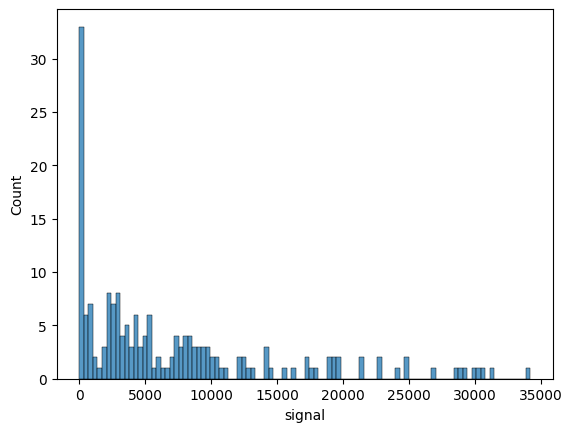

In [3]:
# plot the distribution of the signal
sns.histplot(opt_df["signal"], bins=100)
plt.show()

In [4]:
result = fit(opt_df, const_params, var_params, stratifiers, param_bounds, infer_signal)
result

Fitting 4 parameters with 184 points.
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0576e+10                                    1.53e+09    
       1              3         7.1418e+09      3.43e+09       3.75e+00       3.59e+10    
       2              4         3.9205e+09      3.22e+09       2.30e+00       1.41e+10    
       3              5         2.9447e+09      9.76e+08       3.19e+00       1.75e+10    
       4              6         2.6266e+09      3.18e+08       2.17e+00       5.73e+09    
       5              7         2.5780e+09      4.86e+07       8.46e-01       2.09e+09    
       6              8         2.5625e+09      1.55e+07       6.13e-01       1.13e+09    
       7              9         2.5571e+09      5.37e+06       7.04e-01       6.03e+08    
       8             10         2.5554e+09      1.77e+06       9.59e-01       3.64e+08    
       9             11         2.5547e+09      6.76

,conc,log_KxStar,signal,log_aff_FcgRIIIA-158V,donor,time,variant,cytokine,Tube #,log_rbound_signal_coeff,log_abund_FcgRIIIA-158V,eff_cancer_cell_valency,signal_inferred,se
0,1.000000e-11,-12.0,139.882731,5.530200,2,2,WT,IFN-γ,11,-2.555576,6.147788,23.059247,531.078896,1.530344e+05
1,1.000000e-11,-12.0,0.000000,5.749736,2,2,G236A,IFN-γ,12,-2.555576,6.147788,23.059247,1566.872485,2.455089e+06
2,1.000000e-11,-12.0,1997.931710,6.262451,2,2,A330L I332E,IFN-γ,13,-2.555576,6.147788,23.059247,3128.044313,1.277154e+06
3,1.000000e-11,-12.0,2322.611103,7.000000,2,2,G236A A330L I332E,IFN-γ,14,-2.555576,6.147788,23.059247,3764.030131,2.077689e+06
4,1.000000e-09,-12.0,842.437412,5.530200,2,2,WT,IFN-γ,15,-2.555576,6.147788,23.059247,1911.844845,1.143632e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.000000e-11,-12.0,22769.160337,7.000000,5,4,G236A A330L I332E,MIP-1β,343,-1.888359,6.147788,23.059247,17493.239663,2.783534e+07
180,1.000000e-09,-12.0,14093.218782,5.530200,5,4,WT,MIP-1β,344,-1.888359,6.147788,23.059247,8885.253016,2.712291e+07
181,1.000000e-09,-12.0,9062.187704,5.749736,5,4,G236A,MIP-1β,345,-1.888359,6.147788,23.059247,12230.606437,1.003888e+07
182,1.000000e-09,-12.0,26725.416395,6.262451,5,4,A330L I332E,MIP-1β,346,-1.888359,6.147788,23.059247,16253.429574,1.096625e+08


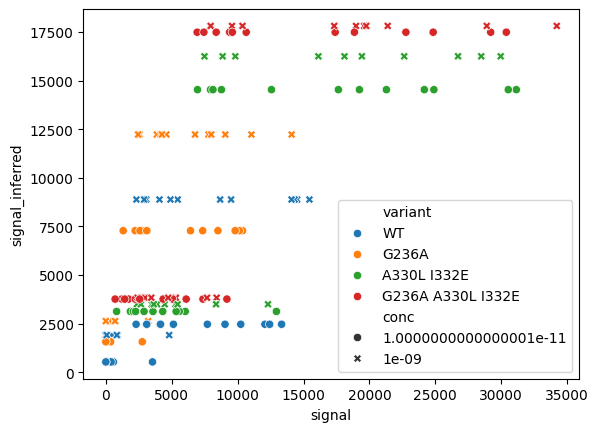

In [5]:
# plot signal vs inferred signal
sns.scatterplot(x="signal", y="signal_inferred", data=result, hue="variant", style="conc")
plt.show()

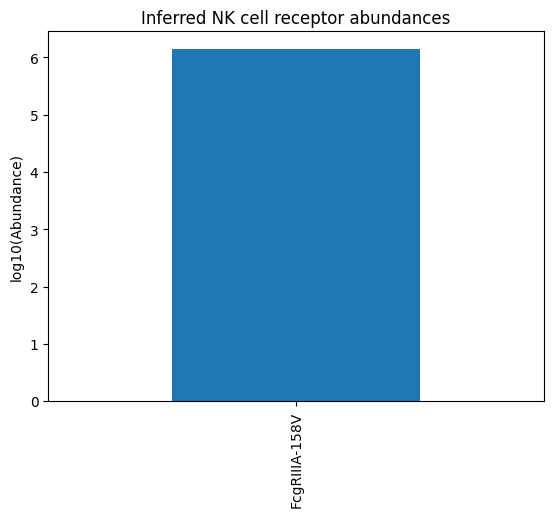

In [6]:
# assert abundances in each row are equal
assert result[ABUNDANCE_COLS].iloc[0].equals(result[ABUNDANCE_COLS].iloc[1])
# plot abundances as barplot
abundances = result[ABUNDANCE_COLS].iloc[0]
# rename abundances to receptor names
abundances.rename(index={abund: rcp for abund, rcp in zip(ABUNDANCE_COLS, RCPS)}, inplace=True)
# plot
ax = abundances.plot(kind="bar")
ax.set_ylabel("log10(Abundance)")
ax.set_title("Inferred NK cell receptor abundances")
plt.show()

Text(0.5, 1.0, 'Affinities by variant (not fit)')

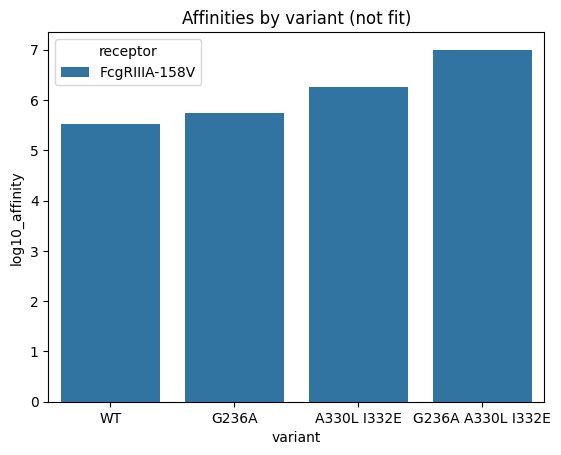

In [7]:
# plot affinities by variant, requiring melt
affinities = result[AFFINITY_COLS + ["variant"]]
affinities_melted = affinities.melt(id_vars=["variant"], value_vars=AFFINITY_COLS, var_name="receptor", value_name="log10_affinity")
# rename columns to receptor names
affinities_melted.replace({aff: rcp for aff, rcp in zip(AFFINITY_COLS, RCPS)}, inplace=True)
ax = sns.barplot(x="variant", y="log10_affinity", hue="receptor", data=affinities_melted)
ax.set_title("Affinities by variant (not fit)")

In [8]:
print("eff_cancer_cell_valency: ", result["eff_cancer_cell_valency"].iloc[0])

eff_cancer_cell_valency:  23.059247006045478


['WT' 'G236A' 'A330L I332E' 'G236A A330L I332E']


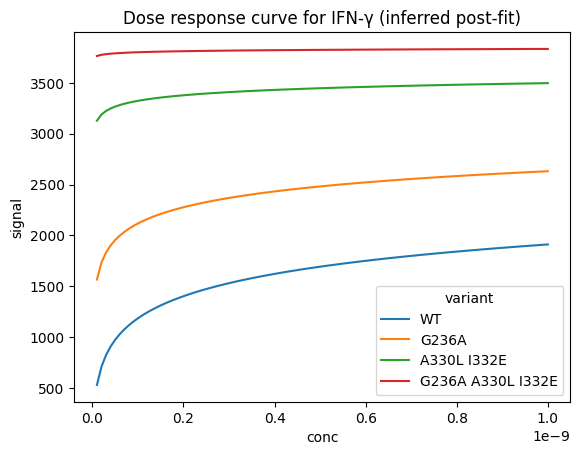

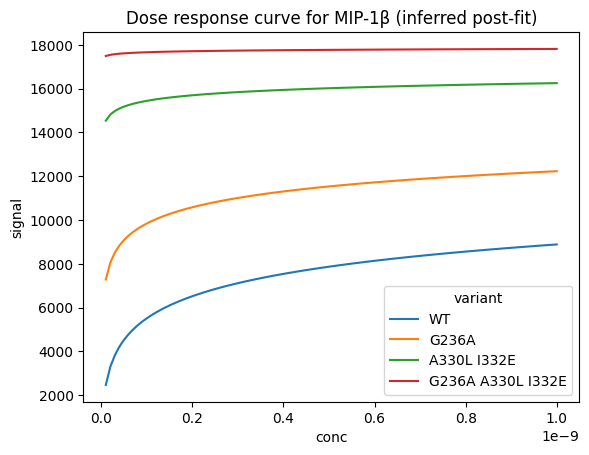

In [14]:
# interpolate / extrapolate model to other Ab concentrations 
result_polate_frame = result.copy().drop(columns=["signal_inferred", "se", "signal"])

variants = result_polate_frame["variant"].unique()
print(variants)

dfs = []
for variant in variants:
    cytokines = result_polate_frame["cytokine"].unique()
    for cytokine in cytokines:
        variant_frame_df = result_polate_frame[(result_polate_frame["variant"] == variant) & (result_polate_frame["cytokine"] == cytokine)]

        # generate a range of Ab concentrations
        ab_conc_range = np.linspace(result["conc"].min(), result["conc"].max(), 100)

        # make rows for each concentration, copying all other values
        for ab_conc in ab_conc_range:
            # get first 
            new_row = variant_frame_df.iloc[0].copy()
            new_row["conc"] = ab_conc
            dfs.append(new_row)

# combine dfs
result_polate = pd.DataFrame(dfs).reset_index(drop=True)

result_polate["signal"] = infer_signal(result_polate)


for cytokine in result_polate["cytokine"].unique():
    cytokine_df = result_polate[result_polate["cytokine"] == cytokine]
    # plot dose response curve
    ax = sns.lineplot(x="conc", y="signal", hue="variant", data=cytokine_df)
    ax.set_title(f"Dose response curve for {cytokine} (inferred post-fit)")
    plt.show()



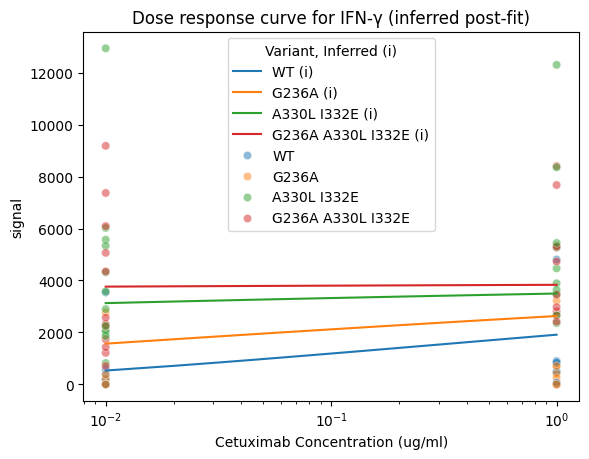

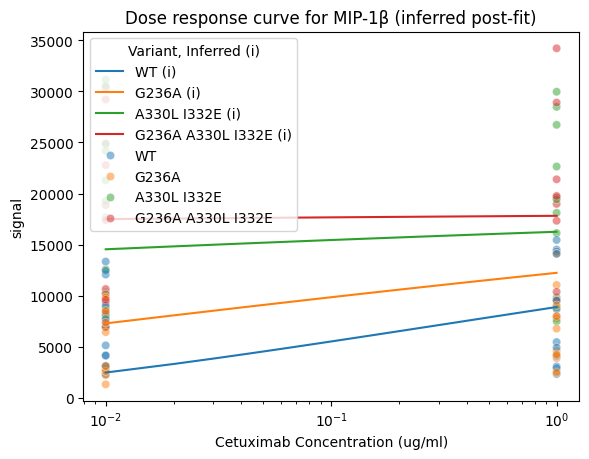

In [21]:
# overlay real data

# stack result_polate and result, making sure they are labeled
result_polate["source"] = "inferred"
result_copy = result.drop(columns=["signal_inferred", "se"])
result_copy["source"] = "measured"
result_stack = pd.concat([result_polate, result_copy])

result_stack["conc"] = result_stack["conc"] * 1e9
# append "inferred" to the variant column for all rows in result_stack where source is "inferred"
result_stack.loc[result_stack["source"] == "inferred", "variant"] = result_stack.loc[result_stack["source"] == "inferred", "variant"] + " (i)"


for cytokine in result_stack["cytokine"].unique():
    cytokine_df = result_stack[result_stack["cytokine"] == cytokine]

    # plot inferred as lineplot, measured as scatterplot
    ax = sns.lineplot(x="conc", y="signal", hue="variant", data=cytokine_df[cytokine_df["source"] == "inferred"])
    sns.scatterplot(x="conc", y="signal", hue="variant", data=cytokine_df[cytokine_df["source"] == "measured"], alpha=0.5, ax=ax)

    ax.set_xscale("log")
    ax.set_xlabel("Cetuximab Concentration (ug/ml)")

    ax.legend(title="Variant, Inferred (i)")

    ax.set_title(f"Dose response curve for {cytokine} (inferred post-fit)")
    plt.show()